# Predicting heart dieasese using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
## Preparing the tools

# we gonna use matplotlib ,pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# import model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#model evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score






In [7]:
df =pd.read_csv("heart-disease.csv")

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [9]:
df =df.drop("Unnamed: 0",axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [10]:
df.shape


(303, 14)

In [11]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

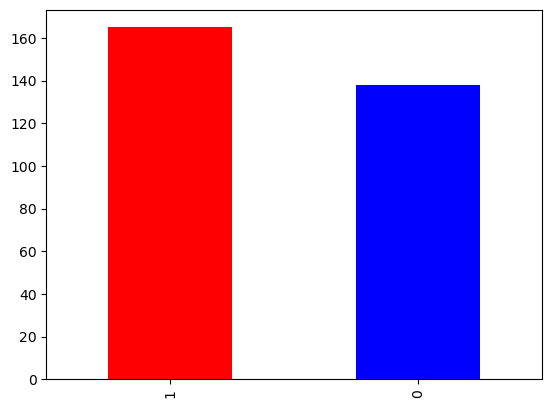

In [12]:
df["target"].value_counts().plot(kind='bar',color=["red","blue"]);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency according to sex 

# 

In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
td=pd.crosstab(df.target,df.sex)

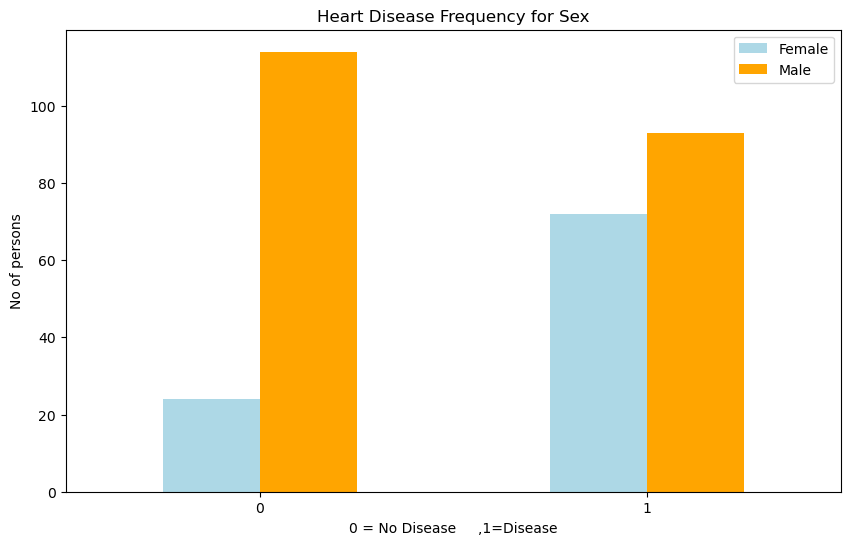

In [18]:
td.plot(kind="bar",figsize=(10,6),color=['lightblue','orange'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease     ,1=Disease")
plt.ylabel("No of persons");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  ### Age vs Max heart rate
    

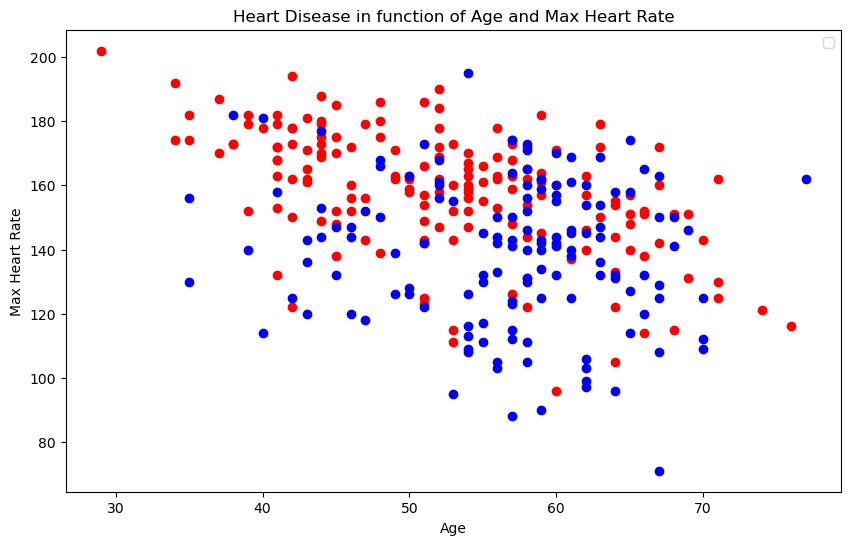

In [20]:
plt.figure(figsize=(10,6))
# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red');

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='blue');

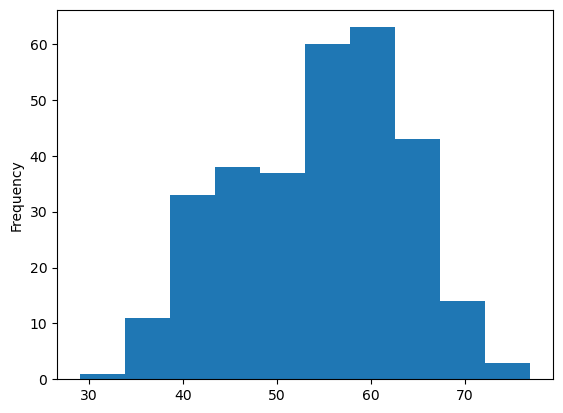

In [21]:
df.age.plot.hist();

# ### Heart Disease Frequency per Chest Pain Type
0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [22]:
ta=pd.crosstab(df.cp,df.target)

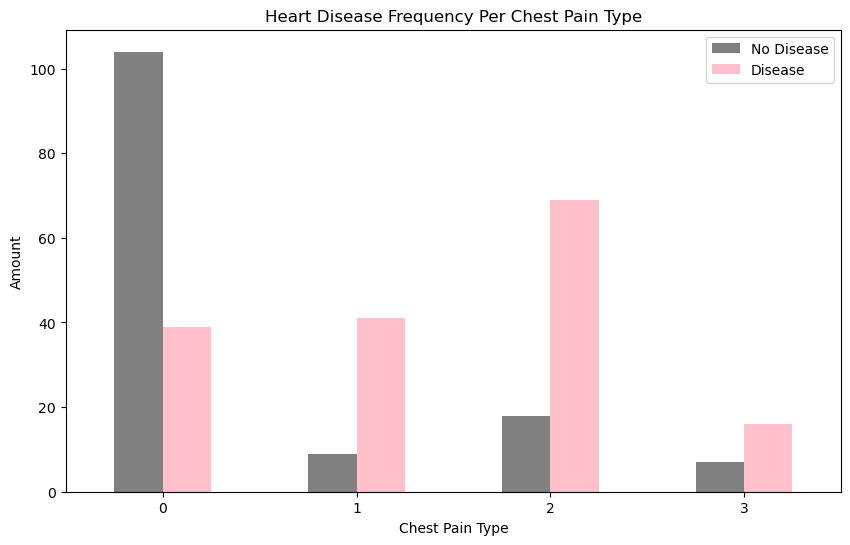

In [23]:
#making cross tab more visual
ta.plot(kind='bar',figsize=(10,6),color=["grey","Pink"])

#add some comunication 
# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

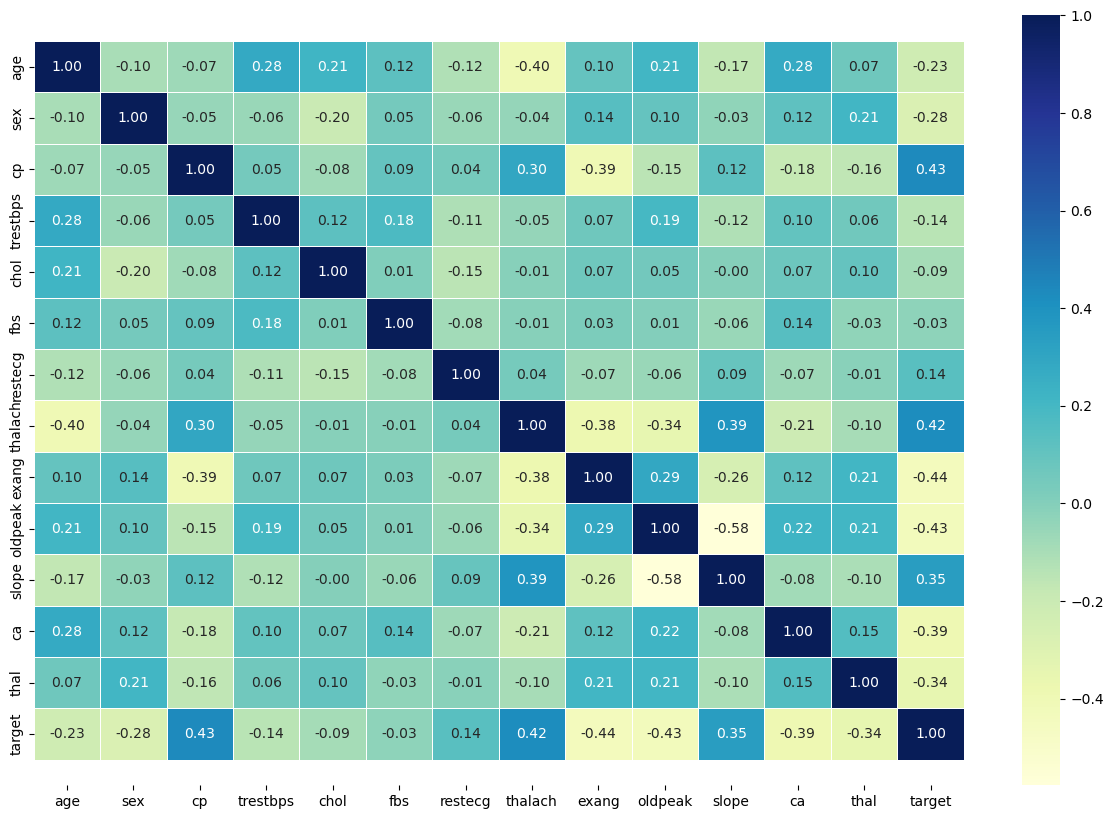

In [26]:
#lets make our correlation matrix a little prettier

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",
cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

# 5.Modeling


In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
#split
x=df.drop("target",axis=1)
y=df["target"]



In [29]:
x,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [30]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
#spliting data into train and test sets 
np.random.seed(42)

#Split into train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [32]:
#put models in a Dictionary

models={"Logistic Regression" : LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "RandomForestClassifier":RandomForestClassifier()}

#create a function
def fit_score(models,x_train,x_test,y_train,y_test):
    """"
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    np.random.seed(42)
    
    #make a dictionary to keep model score
    
    model_score={}
    
    #Loop through models
    
    for name,model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        #evaluate the model and append to its score to model score
        
        model_score[name]=model.score(x_test,y_test)
        
    return   model_score
        

In [33]:
model_scores = fit_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\ASUS\focusprojects\project\heart_disease_proj\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

<Axes: >

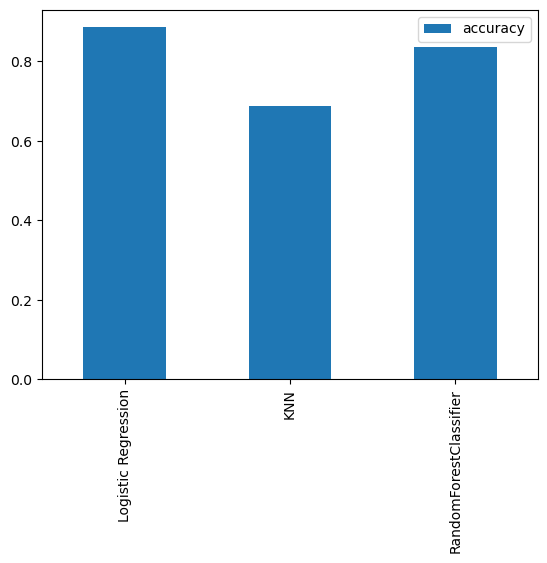

In [34]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

In [35]:
#hyperparameter tuning
#lets tune KNN
train_score=[]
test_score=[]

#create a list of different values for n_neighbours
neighbours =range(1,21)

#setup KNN
knn=KNeighborsClassifier()

#loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    train_score.append(knn.score(x_train,y_train))
    
    test_score.append(knn.score(x_test,y_test))


In [36]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [37]:
test_score


[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


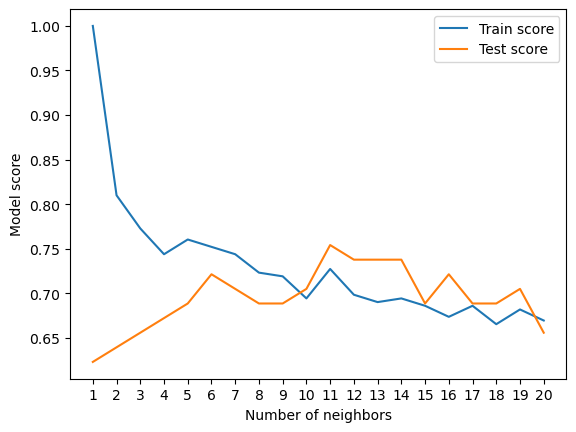

In [38]:
plt.plot(neighbours, train_score, label="Train score")
plt.plot(neighbours, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))

plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

# Hyperparamter tuning with Randamized Search CV

In [39]:
# Logistic 
#Random FOrest 


In [40]:
#create a hyperparamter grid for logistic Regression

log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}

#create a hyperparameter grid for randomforestclassifier

rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}



now we got hyperparamter grid setup for each of our model


In [41]:
#Tune Logistic  Regression

np.random.seed(42)

#Setup random hyperparameters search for Logistic Regression
rs_log=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,
                         n_iter=20,verbose=True)

#Fit random hyperparamter search model
rs_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [43]:
rs_log.score(x_test,y_test)

0.8852459016393442

now we tune Random Forest 

In [44]:
#Tune Logistic  Regression

np.random.seed(42)

#Setup random hyperparameters search for Random Forst Classifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,
                         n_iter=20,verbose=True)

#Fit random hyperparamter search model
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [46]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [47]:
#Tune Logistic  Regression

np.random.seed(42)

#Setup random hyperparameters search for Logistic Regression
gs_log=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,
                      verbose=True)

#Fit random hyperparamter search model
gs_log.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
#check the best hyperparameter
gs_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
gs_log.score(x_test,y_test)

0.8852459016393442

# Evaluting our tuned machine learning classifier, beyond accuracy
ROC curve and AUC score
1. Confusion matrix
2. Classification report
3. Precision
4. Recall
5. F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [50]:
# make prediction with tuned model

y_preds =gs_log.predict(x_test)

In [51]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import RocCurveDisplay
y_preds = 

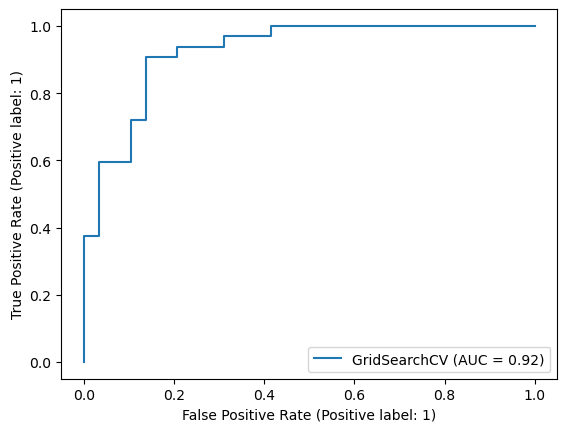

In [54]:
RocCurveDisplay.from_estimator(gs_log,x_test,y_test)

In [55]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


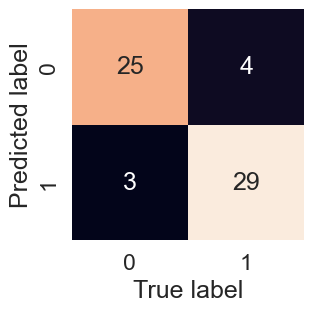

In [56]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """"
    Plots a nice looking  confusion matrix 
    
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
  
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_preds)

In [57]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [58]:
#caluclate evaulation metrics using cross _validation

gs_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
#create a new classifier with best parameters 
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [67]:
#cross_validated accuracy

cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [69]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [70]:
#cross_validated precision
cv_pre = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [71]:
cv_pre = np.mean(cv_pre)
cv_pre

0.8215873015873015

In [81]:
#cross_validated precision
cv_re = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_re

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [82]:
cv_re=np.mean(cv_re)
cv_re

0.9272727272727274

In [75]:
#cross_validated f1
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [76]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [83]:
#visulaization cross validated meterics 

cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_pre,
                        "Recall":cv_re,
                        "F1":cv_f1},index=[0])



In [84]:
cv_metrics


,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


<Axes: title={'center': 'Cross_validated classification metrics'}>

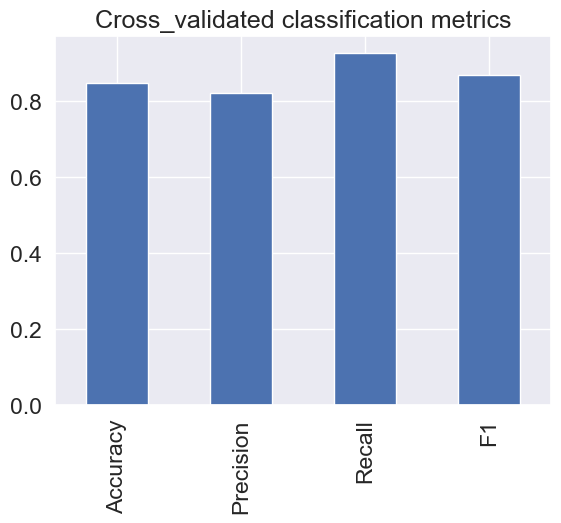

In [86]:
cv_metrics.T.plot.bar(title="Cross_validated classification metrics",legend=False)

# Feature importance 

Feature importance which features contributed the most to the model

In [90]:
#Lets find the feature importance for our Logistic Regression model

#fit an instance for Logistic Regression


clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')

clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [92]:
#chech coef

clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [93]:
#match coef's of features  to columns
features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

<Axes: title={'center': 'Feature Importance '}>

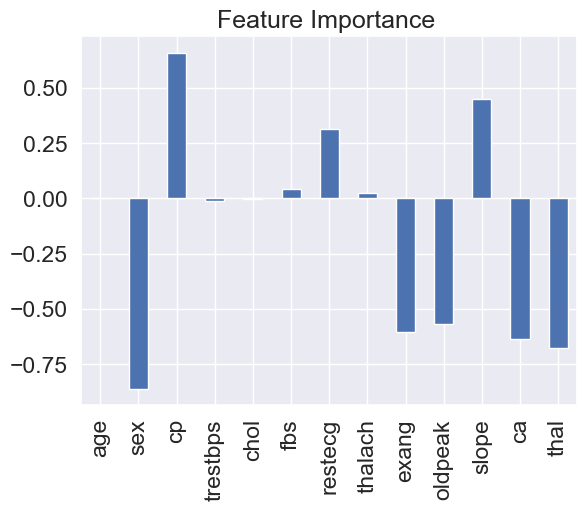

In [95]:
#Visualize feature importance
features_df=pd.DataFrame(features_dict,index=[0])
features_df.T.plot.bar(title="Feature Importance ",legend=False)

In [96]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
## 